In [17]:
import iris
import sys
import warnings
warnings.filterwarnings("ignore")

root_fp = "/nfs/a319/gy17m2a/"
sys.path.insert(0, root_fp + 'PhD/Scripts/FindIndependentRainfallEvents')
from Identify_Events_Functions import *

sys.path.insert(0, root_fp + 'PhD/Scripts/DataProcessing/Regridding')
from Regridding_functions import *

sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from Spatial_plotting_functions import *
from Spatial_geometry_functions import *

gb_gdf = create_gb_outline({'init' :'epsg:3857'})

In [18]:
file_model_2_2km ='/nfs/a319/gy17m2a/PhD/datadir/UKCP18_hourly/2.2km/01/1980_2001/pr_rcp85_land-cpm_uk_2.2km_01_1hr_19910601-19910630.nc'
cube_2km =iris.load_cube(file_model_2_2km)
cube_2km = cube_2km[0,:,:,:]
cube_2km = trim_to_bbox_of_region_regriddedobs(cube_2km, gb_gdf)
cube_2km_bng, lats_bng, lons_bng = convert_rotatedpol_to_bng(cube_2km.copy())

In [19]:
lsm = iris.load("/nfs/a319/gy17m2a/PhD/datadir/lsm_land-cpm_BI_5km.nc")[0]
lsm_2km = lsm.regrid(cube_2km_bng, iris.analysis.Nearest()) 

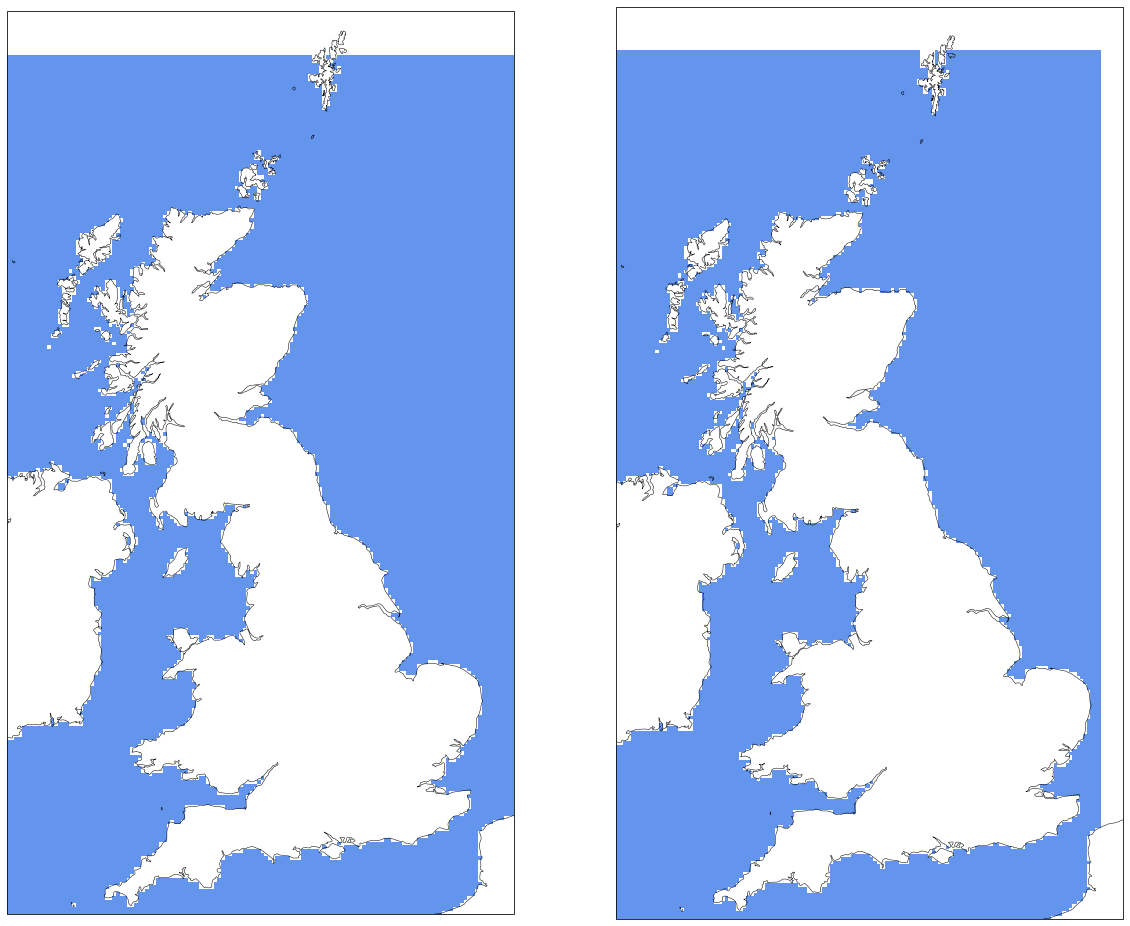

In [20]:
from matplotlib.colors import LinearSegmentedColormap

# Assuming cube_2km_bng_masked and cube_2km_bng_masked_regridded_12km are already defined
fig, ax = plt.subplots(ncols=2, figsize=(20, 20), subplot_kw={'projection': ccrs.OSGB()})  # Use a Cartopy projection

# Create a colormap with two colors
custom_cmap = LinearSegmentedColormap.from_list('name',['cornflowerblue', 'white'])

# Plot the first dataset
plt.sca(ax[0])  # Set the current axis to the first subplot
contour1 = iplt.pcolormesh(lsm, axes=ax[0], cmap=custom_cmap)
ax[0].coastlines(resolution='10m', color='black', linewidth=0.5)
# ax[0].set_title('Original 5km land sea mask')
ax[0].grid('false')

# Plot the second dataset
plt.sca(ax[1])  # Set the current axis to the second subplot
contour2 = iplt.pcolormesh(lsm_2km, axes=ax[1], cmap=custom_cmap)
ax[1].coastlines(resolution='10m', color='black', linewidth=0.5)
# ax[1].set_title('Regridded 2.2km land sea mask')
ax[1].grid('false')

fig.savefig('/nfs/a319/gy17m2a/PhD/Scripts/DataProcessing/Regridding/Figs/comparing_lsm.jpg', bbox_inches= 'tight', dpi=1000)